In [ ]:
#return which gpu has been allocated
!nvidia-smi

Fri May  6 05:53:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow-gpu

#importing library

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=16
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/ProjectDL/Cotton Disease/train",shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE)

Found 1586 files belonging to 4 classes.


In [ ]:
#return the different class names or folder names
class_names=dataset.class_names
class_names

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [ ]:
#Every element in the dataset is batch of 16 images
len(dataset)

100

In [ ]:
for image_batch, label_batch in dataset.take(1):
  #returns the batch size, size,size, RGB-channels
  print(image_batch.shape)
  
  print(label_batch.numpy())

(16, 256, 256, 3)
[2 0 0 2 0 1 3 3 1 3 0 1 1 3 2 2]


In [ ]:
#print individual image
#print first image
for image_batch, label_batch in dataset.take(1):
  #returns tensor
  print(image_batch[0])


tf.Tensor(
[[[191.       247.       176.      ]
  [191.       247.       176.      ]
  [191.       247.       176.      ]
  ...
  [122.29585  107.18648  104.46382 ]
  [113.17561  109.17561  100.17561 ]
  [ 85.62584   81.62584   72.62584 ]]

 [[191.       247.       176.      ]
  [191.       247.       176.      ]
  [191.       247.       176.      ]
  ...
  [126.79326  113.15515  105.33568 ]
  [102.21837   97.085556  84.63193 ]
  [ 74.07666   68.94385   57.151047]]

 [[191.       247.       176.      ]
  [191.       247.       176.      ]
  [191.       247.       176.      ]
  ...
  [105.74248   96.41855   80.5096  ]
  [ 64.84143   57.84143   40.31102 ]
  [100.79585   93.79585   76.99219 ]]

 ...

 [[193.       254.       150.38179 ]
  [193.       254.       150.68666 ]
  [193.       254.       150.79958 ]
  ...
  [ 96.58652   77.141205  66.8194  ]
  [113.00194   90.06305   78.38782 ]
  [146.39369  124.988464 111.70024 ]]

 [[191.       253.       146.      ]
  [191.       253.       1

In [ ]:
#print individual image
#print first image
for image_batch, label_batch in dataset.take(1):
  #returns numpy instead of tensor
  #every number is between 0 to 255, the color is represented between 0 to 255
  print(image_batch[0].numpy())

[[[ 68.144424  61.14442   53.14442 ]
  [116.28242  109.28242  101.28242 ]
  [127.88631  120.88631  112.88631 ]
  ...
  [150.24745  140.24745  130.24745 ]
  [153.09723  143.09723  133.09723 ]
  [151.88702  141.88702  131.88702 ]]

 [[122.689606 115.689606 107.689606]
  [172.66711  165.66711  157.66711 ]
  [142.53442  135.53442  127.53442 ]
  ...
  [147.55591  137.55591  127.5559  ]
  [151.71915  141.71915  131.71915 ]
  [101.10453   91.10453   81.10453 ]]

 [[ 78.936905  71.936905  63.93691 ]
  [187.41954  180.41954  172.41954 ]
  [146.19627  139.19627  131.19627 ]
  ...
  [147.45801  137.45801  127.45801 ]
  [146.4062   136.4062   126.406204]
  [119.71835  109.71835   99.71835 ]]

 ...

 [[162.5875   190.88828  141.4371  ]
  [123.85587  138.01407  102.4047  ]
  [101.15915  101.16696   83.9111  ]
  ...
  [ 88.761765  81.761765  73.761765]
  [107.1613   100.1613    92.1613  ]
  [102.327354  95.327354  87.327354]]

 [[155.62964  184.69707  133.96024 ]
  [128.62125  144.13297  107.57718 ]


In [ ]:
for image_batch, label_batch in dataset.take(1):
  #returns shape of first image
  print(image_batch[0].shape)

(256, 256, 3)


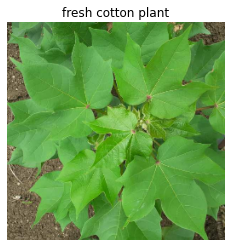

In [ ]:
#try to visualize the image
for image_batch, label_batch in dataset.take(1):
  #3d representation
  #every time we run it shows random image as it has randomness to it
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  #to display the label or to which class it belongs
  plt.title(class_names[label_batch[0]])
  plt.axis('off')

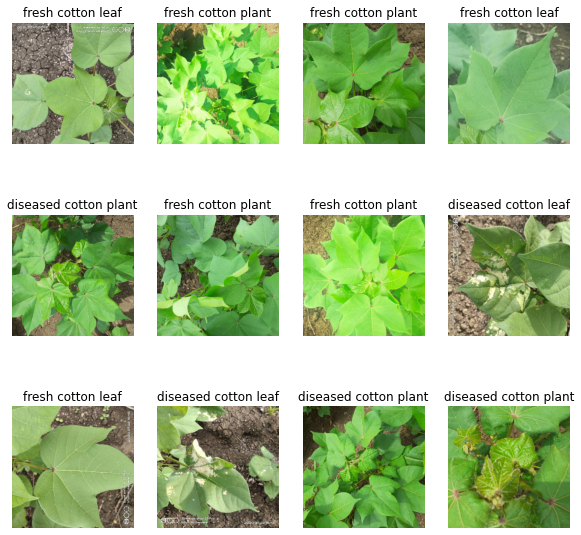

In [ ]:
#try to print 12 images at once
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)

    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
#splitting into train and test data


In [ ]:
len(dataset)

100

In [ ]:
#function to split the dataset to train, val, test
def get_split_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds


In [ ]:
#splitting the dataset
train_ds,val_ds,test_ds=get_split_dataset(dataset)

In [ ]:
#length of train dataset
len(train_ds)

80

In [ ]:
#length of validation dataset

len(val_ds)

10

In [ ]:
#length of test dataset

len(test_ds)

10

In [ ]:

#using prefetch and cache concept so that the data is store in temporary memory , improves performance

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#preprocessing
#resizing
#rescaling
#scale to 0 to 1
#use data augmentation, to make the model robust
#we train the model and  the image is rotated, or the contrast is changed it won't perform better
#to avoid that we use data augmentation
#generate 4 new sample, all 5 image for training.
#predicting, if image is rotated, model will know about it

resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)])


In [ ]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2)])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=4

In [ ]:
#define neural network architechture
model=models.Sequential([resize_and_rescale,
                         data_augmentation,
                         layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         #normalize the probability of classes
                         layers.Dense(n_classes,activation='softmax')

                         
                                                                            ])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
#compile using 
model.compile(
    optimizer='adam',
    #loss function
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    #track the gradient descent
    metrics=['accuracy']
)

#fit the model

In [ ]:
#train the network
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
80/80 [==============================] - 320s 152ms/step - loss: 1.3603 - accuracy: 0.3239 - val_loss: 1.5028 - val_accuracy: 0.3356
Epoch 2/50
80/80 [==============================] - 5s 68ms/step - loss: 1.1028 - accuracy: 0.5237 - val_loss: 1.0287 - val_accuracy: 0.5548
Epoch 3/50
80/80 [==============================] - 5s 68ms/step - loss: 0.9306 - accuracy: 0.6114 - val_loss: 0.9989 - val_accuracy: 0.5685
Epoch 4/50
80/80 [==============================] - 5s 68ms/step - loss: 0.8318 - accuracy: 0.6532 - val_loss: 0.8856 - val_accuracy: 0.5959
Epoch 5/50
80/80 [==============================] - 5s 68ms/step - loss: 0.7413 - accuracy: 0.6840 - val_loss: 0.8185 - val_accuracy: 0.6507
Epoch 6/50
80/80 [==============================] - 5s 68ms/step - loss: 0.6476 - accuracy: 0.7235 - val_loss: 0.6433 - val_accuracy: 0.7397
Epoch 7/50
80/80 [==============================] - 5s 68ms/step - loss: 0.6209 - accuracy: 0.7235 - val_loss: 0.6089 - val_accuracy: 0.7123
Epoch 8/50

In [ ]:
scores=model.evaluate(test_ds)

10/10 [==============================] - 0s 34ms/step - loss: 0.1812 - accuracy: 0.9250


In [ ]:
#loss and accuracy
scores

[0.18124452233314514, 0.925000011920929]

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 80, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#returns the list 50 accuracy,val_accuracy,loss,val_loss values during 50 epochs
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']




Text(0.5, 1.0, 'Training and Validation Loss')

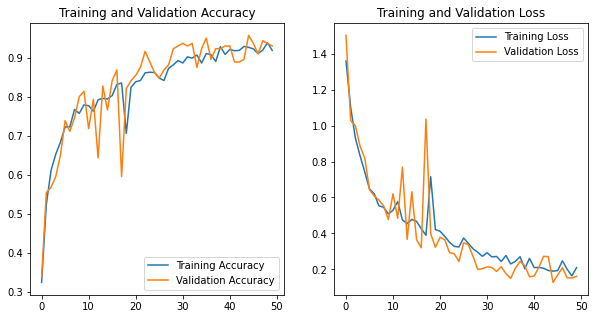

In [ ]:
#plotting the graph
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
import numpy as np

Predicting the First Image
Actual Label of First Image:  fresh cotton leaf
predicted label: fresh cotton leaf


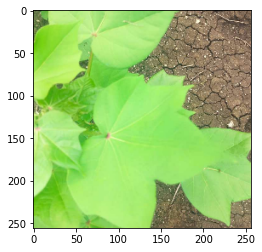

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print('Predicting the First Image')
  plt.imshow(first_image)
  print("Actual Label of First Image: ",class_names[first_label])

  batch_prediction=model.predict(images_batch)
  #returns the class which has highest value among 4 classes
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
#let us create a function to predict batch of images
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0) #create a batch

  prediction=model.predict(img_array)

  predicted_class=class_names[np.argmax(prediction[0])]
  confidence=round(100 *(np.max(prediction[0])),2)
  return predicted_class,confidence

  



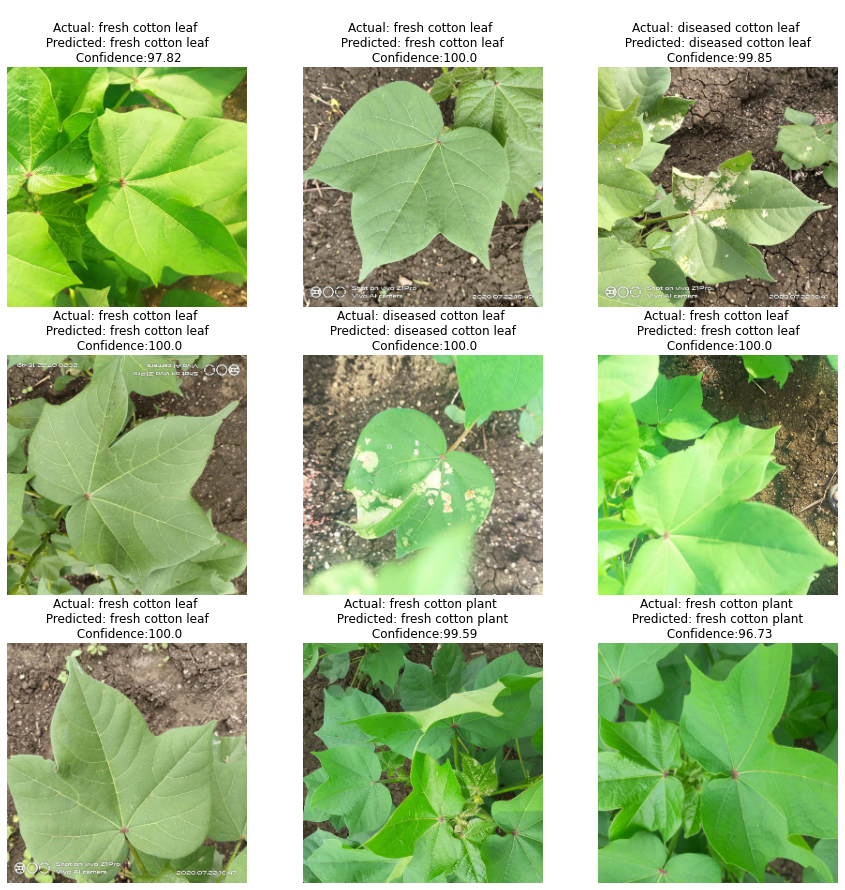

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]

    plt.title(f"\nActual: {actual_class} \n Predicted: {predicted_class} \n Confidence:{confidence}")

    plt.axis("off")



In [ ]:
#saving the model
model_version=1
model.save(f"/content/drive/MyDrive/ProjectDL/Cotton Disease/model/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ProjectDL/Cotton Disease/model/1/assets
